# Recursive Partitioning for Heterogeneous Causal Effects

Susan Athey, Guido W. Imbens

# 1. Brief summary of the paper

#### 1.1 The paper proposes methods (estimators) to addresses two related concerns :

#### a. "estimating heterogeneity by covariates or features in causal effects in experimental/observational studies" 
#####  How? Using Causal Trees
- "causal trees provide a data-driven approach to partitioning the data into subgroups that differ by the magnitude of their treatment effects". 
- "Much like decision trees, which partition the covariate space by finding subgroups with similar outcomes, causal trees find subgroups with similar treatment effects. 
- The subgroups do not need to be specified apriori.

#### b. "conducting (hypothesis tests) inference about the magnitude of the differences in treatment effects across subsets of the population."
#### How? Using Honest Trees
- "To ensure valid estimates of the treatment effect within each subgroup, Athey and Imbens propose a sample-splitting approach that they refer to as honesty.
> a method is honest if it uses one subset of the data to estimate the model parameters, and a different subset to produce estimates given these estimated parameters. 

#### Honest Causal Trees
- For causal trees,"honesty implies that the asymptotic properties of treatment effect estimates within leaves are the same as if the tree partition had been exogenously given, and it is one of the assumptions required to produce unbiased and asymptotically normal estimates of the treatment effect". 
- Consequently "the approach enables the construction of valid confidence intervals for treatment effects, even with many covariates relative to the sample size, and without “sparsity” assumptions"i.e. "these methods provide valid confidence intervals without restrictions on the number of covariates or the complexity of the data-generating process".

Thus the main focus of the paper is on obtaining accurate estimates of and inferences for an estimator of heterogenous conditional average treatment effects using honest, causal trees:
- The output of causal trees is a set of unbiased , asymptotically  normal treatment effects and confidence intervals for each subspace /group

### 1. 2 Two Important Potential Applications
- Useful to researchers as for " experiments, [the] method allows researchers to identify heterogeneity in treatment effects that was not specified in a preanalysis plan, without concern about invalidating inference due to searching over many possible partitions" i.e. "It enables researchers to let the data discover relevant subgroups while preserving the validity of confidence intervals constructed on treatment effects within subgroups."
- "Honest,causal trees can discover subpopulations with lower-than-average or higher-than-average treatment effects while producing confidence intervals for these estimates with nominal coverage, despite having searched over many possible subpopulations".

Caveat : "approach is tailored for applications where there may be many attributes of a unit relative to the number of units observed, and where the functional form of the relationship between treatment effects and the attributes of units is not known" i.e. if you are conviced that the relationship is linear, this method it not likely to work well.

#### Focus here on: Understanding and applying honest causal trees


#### Common Notation

$X_{i}$: is a $p$-dimensional vector of observable pre-treatment characteristics

$W_{i} \in \{0, 1\}$: is a binary variable indicating whether the individual was treated ($1$) or not ($0$)
Assume random assignment of $W_{i}$

$Y_{i}^{obs} \in \mathbb{R}$: a real variable indicating the observed outcome for that individual

$\Pi$ : Tree

$l(x|\Pi)$ : Leaf in tree

# 2. Heterogenous Treatment Effects


### 2.1 HET Model: Rubin (1974) causal model or potential outcome framework

The potential outcome frame work asks the question "what _would have_ happened if we had assigned the treatment to certain control units?"

$Y_{i}(1)$: the outcome individual $i$ would attain if they received the treatment

$Y_{i}(0)$: the outcome individual $i$ would attain if they were part of the control group

Want to predict individual i’s treatment effect $\tau_{i}$ = $Y_{i}(1)$ - $Y_{i}(0)$

However, 
- it is impossible to know an individuals treatment effect as we only observe $Y_{i}(0)$ or $Y_{i}(1)$ because individual cannot belong to both the control and treatment group at the same time. 
- Thus the treatment effect is not observed for any individual. So how does one estimate the impact of a treatment? Using average treatment effects.

### 2.2 Average Treatment Effects (ATE)
Given the assumption that a treatment is randomly assigned, the ATE is computed using the difference between the mean outcomes of the treated and control groups as follows:

By independence from random assignment we have
$$ E[Y_{i}(1)-Y_{i}(0)] = E[Y_{i}(1)]-E[Y_{i}(0)]$$
$$ = E[Y_{i}|W_{i}=1]-E[Y_{i}|W_{i}=0] $$

However, the ATE may differ across groups (identified on the basis of X). The varying impact of a treatment across group can be calculated using Conditional Average Treatment Effects.

### 2.3 Conditional Average Treatment Effects (CATE)
Conditional Average Treatment Effects as computed using the difference between the mean outcomes of the treated and control groups for each subgroup ($X_{i}=x$) as follows

$$ E[Y_{i}(1)-Y_{i}(0)|X_{i}=x] = E[Y_{i}(1)|X_{i}=x]-E[Y_{i}(0)|X_{i}=x]$$
$$ = E[Y_{i}|W_{i}=1,X_{i}=x]-E[Y_{i}|W_{i}=0,X_{i}=x] $$

So, CATE is a conditional expectation based on population characteristics. Thus, machine learning methods like CART/decison trees which essentially compute conditional expectations as predictions. Unbiased estimates of this will be eventually calculated by honest,causal trees.

# 3. Why are regression trees suitable for estimating HET?

#### 3.1 Why a tree over OLS?
- Trees do not suffer from N<P contraint and sparcity concerns of OLS : An OLS with many interactions from HET is likely to lack statistical significance/misreport statistical significance.
- Trees give non-linear interactions , unlike OLS and other penalizaed regression methods which are linear

#### 3.2 (Briefly) What is a regression tree ? 

A regression tree is a non-parametric method which splits the entire $𝑋_{𝑝,𝑖}$ space into R rectangular and nonoverlapping sub-samples called leafs (given by $𝐿_{1}, 𝐿_{2} , …, 𝐿_{𝑅}$) such the RSS is minimized across all R leaves as follows: 

\begin{align}
𝑅𝑆𝑆_{𝑡𝑟𝑒𝑒} = \sum\nolimits_{r = 1}^{R}\sum\nolimits_{i \in L_{r}}(Y_{i} - \hat{Y_{L_{r}}})^2 .....(2) 
\end{align}
where,
$$\hat{Y_{L_{r}}} = \overline{Y_{L_{r}}}$$

i.e. the predicted value for Y𝑖 in each leaf is the average value of  $Y_{i}$ in leaf $𝐿_{𝑅}$. 

###### How does a regression tree find the leaves which minimize (2)? 
- The MSE gives the splitting criterion at each partition.
- It sequentially divides 𝑋𝑝,𝑖 into two successively smaller sub-regions based on threshold values for each split
> A threshold value is the observation i of independent variable 𝑋𝑝 that splits entire region into two regions such that the MSE is minimized across sub-regions. To find the threshold value t, the regression tree splits the region under consideration into two regions based on each observation i for each independent variable  𝑋𝑝 and chooses the (i, 𝑋𝑝) pair which gives the lowest MSE. 
- This process of sequential, binary splitting continues till a stopping criterion is reached to prevent over fitting. The last layer of sub-samples form the leaves 𝐿𝑅 where 𝑦𝐿𝑅
- Thus leaf is a distinct sub-group of the population and each subgroup is defined by certain population characteristics given by ($X_{i}$). Thus, the $Y_{i}$ in each leaf share common $X_{i}$ based population characteristics.
- the prediction in each leaf is a conditional population average.
- a regression decision tree is a variance reduction algorithm: 
> How? The splitting criterion calculates the variance of each node and then calculates the variance of each split as the weighted average of each node variance. This can be made explicit by reformulating (2) as 

$$𝑅𝑆𝑆_{𝑡𝑟𝑒𝑒} = \sum\limits_{r = 1}^{R}{n_{L_{r}}}\frac{(y_{i} - \overline{y_{L_{r}}})^2}{n_{L_{r}}} .....(3)$$

> i.e. $𝑅𝑆𝑆_{𝑡𝑟𝑒𝑒}$ is the weighted average of each within leaf variance. Thus, regression trees aim to reduce variance albeit at the cost an increase in bias.

Note: when building a tree, it is important to have a cross validation sample to avoid overfitting.

#### So, why not just use an off the shelf regression tree to estimate HET?
- The tree may split on idiosyncratic noise rather than true heterogenous effects giving spurious heterogeniety/groups:
  This is akin to finding "spurious effects just by estimating many different specifications".
###### Author's fix: Building the tree honestly i.e. "one sample is used to construct the partition and another to estimate  treatment effects for each subpopulation."
- Estimates in leafs are likely to be biased (see p.7355 of Athey and Imbins (2016))
##### Author's fix: Building the tree honestly 
- Observeable $Y_{i}$ is essential for bulidng a tree but for treatment effects, the variable we want to predict $\tau_{i}$  is unobserved
##### Author's fix: Make the trees causal


Thus, building honest trees corrects for a. biasedness and b.spurious heterogeniety in the usual regression tree (/CART) algorithm.

# 4. Building Honest Causal Trees

#### 4.1 Assumptions

Authors make two identification assumptions:
1.  Unconfoundedness

$$Y_{i}(1),Y_{i}(0)⊥W_{i} | X_{i}$$
i.e. "once we condition on observable characteristics, the treatment assignment is independent to how each person would respond to the treatment. In other words, the rule that determines whether or not a person is treated is determined completely by their observable characteristics. This allows, for example, for experiments where people from different genders get treated with different probabilities, but it rules out experiments where people self-select into treatment due to some characteristic that is not observed in our data".

2. Overlap
"In order to estimate the treatment effect for a person with particular characteristics Xi=x, we need to ensure that we are able to observe treated and untreated people with those same characteristics so that we can compare their outcomes. The overlap assumption states that at every point of the covariate space we can always find treated and control individuals.

∀ x∈supp (X),0<P (W=1 | X=x)<1

> Holds for completely randomized experiments too

### 4.2 Building Honest Trees

- The paper defines an honest model as one that "does not use the same information for selecting the model structure (here, the partition of the covariate space) as for estimation given a model structure".
- The authors achive this for regression trees "by splitting the training sample into two parts, one for constructing the tree (including the cross-validation step) and a second for estimating treatment effects within leaves of the tree."

###### Why is it important to split the training sample?
1. Fitting and estimating on the training/same sample risks overfitting: Estimating many “heterogeneous effects” that are really just noise idiosyncratic to the sample.
2. "Honesty has the implication that the asymptotic properties of treatment effect estimates within the partitions are the same as if the partition had been exogenously given".

### Modifications to CART algorithm

As stated previously, building honest trees corrects for the following in the usual regression tree (/CART) algorithm.
a. biasedness
b.spurious heterogeniety

### Honest Inference for Population Average

For partition $\Pi$,the MSE is
- averaged over observations in the test sample
- using conditonal population means from the estimation sample

Formally,

$$ MSE_{\mu}(S^{te},S^{est},\Pi) = \frac{i}{No. of obs. in  S^{te}}[\underbrace{(Y_{i}-\hat{\mu}(X_{i}|S^{est},\Pi))^2}_\text{MSE Criterion} - \overbrace{Y_{i}^2}^\text{author addtion to simplify maths}] $$

In words, this means that the tree is going to minimize the difference between observations in the testing sample in a particular leaf and the corresponding conditional mean for that leaf which was calculated the estimation sample.

The adjusted/expected MSE = $EMSE_{\mu}(\Pi)$ = $E_{S^{te},S^{est}}(MSE_{\mu}(S^{te},S^{est},\Pi))$

#### Thus, the honest objective function/criterion is to maximize

$$Q^{H}(\Pi) = -E_{S^{te},S^{est},S^{tr}}(MSE_{\mu}(S^{te},S^{est},\Pi))$$

###### CART Modification 1
- In classical CART approach, $S^{est} = S^{tr}$
- However, honest extimation results in anticipation of honest estimation i.e. the re-estimation in the test sample is anticipated and thus, error is minimized keeping that in mind which results in a change in objective function 
- Thus,here $S^{est}$ different $S^{tr}$

##### Modification 2: Honest splitting
a. Mod 2.1: Change splitting criterion to incorporate the fact that unbiased leaf estimates will be generated using $S^{te}$ (to eliminate on source of over fitting , treating $S^{te}$  as an RV in the tree building phase.

b. Mod 2.2: "explicitly incorporate the fact that finer partitions generate greater variance in leaf estimates" - penalize small leafs

###### Developing the honest splitting criterion i.e. an analytic estimator for  $EMSE_{\mu}(\Pi)$

Estimate expected MSE ($EMSE_{\mu}(\Pi)$) using only the training sample -> This will be used to place splits when training a tree.

$$- EMSE_{\mu}(\Pi) = - E_{S^{te},S^{est}} [(Y_{i}-\hat{\mu}(X_{i}|S^{est},\Pi))^2 - Y_{i}^2] $$
$$= - E_{X_{i}}[\mu^{2}(X_{i}|\Pi] - E_{S^{est},X_{i}}[V(\hat{\mu}(X_{i}|S^{est},\Pi)]$$

###### Finding an estimator: 
given the above expansion, it is required that an estimator of $EMSE_{\mu}(\Pi)$ be based on only $S^{tr}$ and $N^{est}$

###### a. Estimator for $V(\hat{\mu}(X_{i}|S^{est},\Pi))$ 

As stated previously, within each leaf, there is an unbiased estimator for variance of estimted mean of the leaf.

Within leaf variance = $\hat{V}(\hat{\mu}(X_{i}|S^{est},\Pi)$ = $\frac{S_{S_{tr}}^2(l(x|\pi)}{N^{est}(l(x|\pi)}$

To get the expected value of variance across all leafs , weigh each leaf variance by leaf share $p_{l}$ and take the sum. 

Formally,

$E_{S^{est},X_{i}}[V(\hat{\mu}(X_{i}|S^{est},\Pi)] = \sum\nolimits_{l}p_{l}\frac{S_{S_{tr}}^2(l(x|\pi)}{N^{est}(l}$

Assuming that each leaf has an equal number of leafs,re-express above as

$E_{S^{est},X_{i}}[V(\hat{\mu}(X_{i}|S^{est},\Pi)] = \sum\nolimits_{l}\frac{1}{Num leaves}\frac{S_{S_{tr}}^2(l}{\frac{N^{est}}{Num leaves}}$

Simplifying

$E_{S^{est},X_{i}}[V(\hat{\mu}(X_{i}|S^{est},\Pi)] = \frac{1}{{N^{est}}}\sum\nolimits_{l}S_{S_{tr}}^2(l)$

###### b. Estimator for $E_{X_{i}}[\mu^{2}(X_{i}|\Pi)]$

Using $V(\hat{\mu}|x,\Pi) = E(\hat{\mu}^2|x,\Pi) - E(\hat{\mu}|x,\Pi)$

Applying the same logic as term 2 and using $E(\hat{\mu}^2(x|S,\Pi)) = \mu(x|\Pi)$

$$ \frac{S_{S_{tr}}^2(l(x|\pi))}{N^{tr}(l(x|\pi))} = E(E(x|S^{tr},\Pi)^2|x,\Pi) - \mu^2(x|\Pi) $$

Re-arranging,

$$\mu^2(x|\Pi) = \hat{\mu}^2(x|S^{tr},\Pi) - \frac{S_{S_{tr}}^2(l(x|\pi))}{N^{tr}(l(x|\pi))}$$

Thus, the estimator is

$$\hat{E}(\mu^2(x|\Pi)) = E(\hat{\mu}^2(x|S^{tr},\Pi)) - E(\frac{S_{S_{tr}}^2(l(x|\pi))}{N^{tr}(l(x|\pi))})$$

$$\hat{E}(\mu^2(x|\Pi)) = \frac{1}{N^{tr}}\sum\nolimits_{i \in S^{tr}}\hat{\mu}^2(x|S^{tr},\Pi) - \frac{1}{N^{tr}}\sum\nolimits_{i \in S^{tr}}S_{S_{tr}}^2 $$

###### Combining both estimators
$$ - \hat{EMSE_{\mu}}(\Pi) =  \frac{1}{N^{tr}}\sum\nolimits_{i \in S^{tr}}\hat{\mu}^2(x|S^{tr},\Pi) - \frac{1}{N^{tr}}\sum\nolimits_{i \in S^{tr}}S_{S_{tr}}^2 - \frac{1}{{N^{est}}}\sum\nolimits_{l}S_{S_{tr}}^2(l)$$

Rearranging

$$ - \underbrace{\hat{EMSE_{\mu}}(\Pi)}_\text{unbiased estimator of EMSE${\mu}(\Pi)$} =  \underbrace{\frac{1}{N^{tr}}\sum\nolimits_{i \in S^{tr}}\hat{\mu}^2(x|S^{tr},\Pi)}_\text{a. Usual CART Criterion} - \underbrace{(\frac{1}{N^{tr}} +\frac{1}{{N^{est}}})\sum\nolimits_{i \in S^{tr}}S_{S_{tr}}^2(l)}_\text{a. uncertainity about leaf mean}$$

The estimator so derived is unbiased and penalizes the creation of leaves that have high uncertainity i.e. leaves which have high variance and/or small $N^{tr},N^{est}$ as

- for given x, within leaf variance is directly proportional to within leaf MSE i.e. within leaf variance will be high when within leaf MSE is high (and vice versa)
- $(\frac{1}{N^{tr}} +\frac{1}{{N^{est}}})$ is inversly proportional to  $N^{tr},N^{est}$

#### Honest Inference : Getting unbiased CATE from leaf

- The output of a honest tree is an unbaised conditional population average - which is not what we're looking for.
- Instead we want conditional average treatment effects (CATE)

Modification 3: This requires modifying the honest tree algorithm such that the treatment variable is indicated seperate from the rest of the Xi.

For each leaf the average causal effect is

$$\tau(x|\Pi) = E[Y_{i}(1) - Y_{i}(0)|X_{i}\in l(x|\Pi)] =  \mu(1,x|S,\Pi) - \mu(0,x|S,\Pi)$$

where
$$\mu(w,x|\Pi) = \text{the population average outcome} = \mathop{\mathbb{E}}[Y_{i}(W_{i})|X_{i}\in l(x|\Pi)]$$


The corresponding estimator for $\tau(x|\Pi)$ is:
$$\hat{\tau}(x|\Pi) = \hat{\mu}(1,x|S,\Pi) - \hat{\mu}(0,x|S,\Pi)$$

where 
$$\hat{\mu}(w,x|S,\Pi) = \underbrace{\frac{1}{\#(i \in S_{w}|X_{i} \in l(x|\Pi))}\sum\nolimits_{i \in S_{w}|X_{i} \in l(x|\Pi)}Y_{i}^{obs}}_\text{average of $Y_{i}$ in leaf l when $W_{i}$ = $w_{i}$}$$

Now, within a leaf, we are estimating treatment effect rather mean. Thus, the MSE is modifyied as follows:

Modification 4:
$$ MSE_{\tau}(S^{te},S^{est},\Pi) = \frac{i}{No. of obs. in  S^{te}}[\underbrace{(\tau_{i}-\hat{\tau}(X_{i}|S^{est},\Pi))^2}_\text{MSE Criterion} - \overbrace{\tau_{i}^2}^\text{author addtion to simplify maths}] $$

###### However, $\tau_{i}$ is never observed. However, $MSE_{\tau}(S^{te},S^{est},\Pi)$ can still be estimated by adapting $\hat{EMSE_{\mu}}(\Pi)$ for $\hat{EMSE_{\tau}}(\Pi)$that only depends on $S^{tr}$ and $N^{est}$

$$ - \underbrace{\hat{EMSE_{\tau}}(\Pi)}_\text{unbiased estimator of EMSE${\tau}(\Pi)$} =  \underbrace{\frac{1}{N^{tr}}\sum\nolimits_{i \in S^{tr}}\hat{\tau}^2(x|S^{tr},\Pi)}_\text{a. Variance of treatment
effects across leaves,prefers leaves with heterogenous effects} - \underbrace{(\frac{1}{N^{tr}} +\frac{1}{{N^{est}}})\sum\nolimits_{l}(\frac{S_{S_{treatment}}^2(l)}{p} +\frac{S_{S_{control}}^2(l)}{1-p} )}_\text{b. Uncertainty about leaf treatment effects:prefers leaves with good fit}$$

where $$p = \text{share of treated units} = \frac{N_{treatment}}{N}$$

Using the above as the splittin criterion results in a causal tree that "rewards a partition for finding strong heterogeneity in treatment effects (a) and penalizes a partition that creates variance in leaf estimates (b)" (i.e. makes groups based on didiosyncratic noise).

Thus, "the tree is “causal” because it is fit by asking the data, “Where can we make a split that will produce the biggest difference in treatment effects across leaves, but still give us an accurate estimate of the treatment effect?” 

### In brief summary: Honest Causal Trees

The tree building process is similar to that of CART but the splitting creterion/ objective function is different i.e. it is $-EMSE(S^{tr},N^{est},\Pi)$. For cross valiation, same funtion is used for splitting but with $S^{tr,cv}$.

### Advantages of this approach
Can easily separate tree construction from treatment effect
estimation
- Tree constructed on training sample is indep. of sampling variation in test sample
- Holding tree from training sample fixed, can use standard methods to conduct inference within each leaf of the tree on test sample
- Use any valid method for treatment effect estimation, not just method used in training. Asymptotic theory as usual within a leaf.
- Once you have the partition, just run a regression on second sample interacting leaf dummies with treatment indicator. 

### Tradeoff:
- COST: sample splitting means build shallower tree, less personalized predictions, and lower MSE of treatment effects.
- BENEFIT: Valid confidence intervals with coverage rates that do not deteriorate as data generating process gets more complex or more covariates are added.

# Code Starts 
All of this code is From Susan Athey's HTE_tutorial.Rmd/html notebook, only broken down more for greater understanding.

### Importing the required libraries

In [45]:
library(tidyverse)
library(tidyselect)
library(dplyr)       # Data manipulation (0.8.0.1)
library(fBasics)     # Summary statistics (3042.89)
library(corrplot)    # Correlations (0.84)
library(psych)       # Correlation p-values (1.8.12)
library(grf)         # Generalized random forests (0.10.2)
library(rpart)       # Classification and regression trees, or CART (4.1-13)
library(rpart.plot)  # Plotting trees (3.0.6)
library(treeClust)   # Predicting leaf position for causal trees (1.1-7)
library(car)         # linear hypothesis testing for causal tree (3.0-2)
library(devtools)    # Install packages from github (2.0.1)
library(readr)       # Reading csv files (1.3.1)
library(tidyr)       # Database operations (0.8.3)
library(tibble)      # Modern alternative to data frames (2.1.1)
library(knitr)       # RMarkdown (1.21)
library(kableExtra)  # Prettier RMarkdown (1.0.1)
library(ggplot2)     # general plotting tool (3.1.0)
library(haven)       # read stata files (2.0.0)
library(aod)         # hypothesis testing (1.3.1)
library(evtree)      # evolutionary learning of globally optimal trees (1.0-7)
library(purrr)
library(car) 

install_github("susanathey/causalTree")
library(causalTree)

Skipping install of 'causalTree' from a github remote, the SHA1 (a7250560) has not changed since last install.
  Use `force = TRUE` to force installation


### Loading the data

Dataset : welfare dataset, from “Modeling Heterogeneous Treatment Effects in Survey Experiments with Baysian Additive Regression Trees” (Green and Kern, 2012). By changing the dataset name below,different datasets can be used to see how the estimates would differ. You can select from the following list of datasets from our github webpage https://github.com/gsbDBI/ExperimentData/:

charitable: from “Does Price Matter in Charitable Giving?” (Karlan and List, 2007)

secrecy: from “Ballot Secrecy Concerns and Voter Mobilization” (Gerber, Hubers, Biggers, and Henry, 2014)

social: from “Social Pressure and Voter Turnout” (Gerber, Green, and Larimer, 2008)

criteo: A public benchmark dataset for measuring effect of digital advertising.

mobilization: from “Comparing Experimental and Matching Methods Using a Large-Scale Voter Mobilization Experiment” 
(Arceneaux, Gerber, and Green, 2006) 


In [60]:
setwd("C:/Users/Cafral/Desktop/CAFRAL/SusanAthey/data")

# R script for reading data from github repository, set path to where you have the tutorial files saved.
source('load_data.R')

df_experiment <- select_dataset("welfare")
head(df_experiment,10)

Parsed with column specification:
cols(
  .default = col_double(),
  racdif1 = col_character(),
  racdif2 = col_character(),
  racdif3 = col_character(),
  racdif4 = col_character(),
  `_mergescore` = col_character()
)
See spec(...) for full column specifications.


year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,d_2001,d_2002,d_2003,d_2004,d_2005,d_2006,d_2007,d_2008,d_2009,d_2010
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1986,1,1,40,NA,NA,270,44,2,2,...,0,0,0,0,0,0,0,0,0,0
1986,2,7,NA,NA,1,195,51,2,2,...,0,0,0,0,0,0,0,0,0,0
1986,3,1,40,NA,NA,184,51,2,2,...,0,0,0,0,0,0,0,0,0,0
1986,4,5,NA,NA,1,311,36,2,1,...,0,0,0,0,0,0,0,0,0,0
1986,5,2,NA,NA,NA,NA,NA,2,NA,...,0,0,0,0,0,0,0,0,0,0
1986,6,7,NA,NA,1,902,12,2,1,...,0,0,0,0,0,0,0,0,0,0
1986,7,7,NA,NA,2,NA,NA,NA,NA,...,0,0,0,0,0,0,0,0,0,0
1986,8,1,40,NA,NA,123,78,2,2,...,0,0,0,0,0,0,0,0,0,0
1986,9,1,40,NA,NA,184,51,2,2,...,0,0,0,0,0,0,0,0,0,0


### Cleaning the Data

Dropping columns that aren’t outcomes, treatments or (pre-treatment) covariates

In [54]:
outcome_variable_name

[1] "y"

In [55]:
treatment_variable_name

[1] "w"

In [49]:
covariate_names

[1] "hrs1"     "partyid"  "income"   "rincome"  "wrkstat"  "wrkslf"  
 [7] "age"      "polviews" "educ"     "earnrs"   "race"     "wrkslf"  
[13] "marital"  "sibs"     "childs"   "occ80"    "prestg80" "indus80" 
[19] "res16"    "reg16"    "mobile16" "family16" "parborn"  "maeduc"  
[25] "degree"   "sex"      "race"     "born"     "hompop"   "babies"  
[31] "preteen"  "teens"    "adults"

In [181]:
# Combine all names
all_variables_names <- c(outcome_variable_name, treatment_variable_name, covariate_names)
df <- df_experiment %>% select(all_variables_names)

# Drop rows containing missing values
df <- df %>% drop_na()

# Rename variables
#The treatment wdenoted W, and the outcome denoted Y 
df <- df %>% rename(Y=outcome_variable_name,W=treatment_variable_name)

# Converting all columns to numerical as some of the methods below don’t accept factor variables
df <- data.frame(lapply(df, function(x) as.numeric(as.character(x))))                
df <- df %>% mutate_if(is.character,as.numeric)
                        
#add row id
df <- df %>% rowid_to_column( "ID")
head(df,5)

,ID,Y,W,hrs1,partyid,income,rincome,wrkstat,wrkslf,age,...,parborn,maeduc,degree,sex,born,hompop,babies,preteen,teens,adults
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,40,4,12,11,1,2,29,...,0,16,3,2,1,2,0,0,0,2
2,2,0,1,35,1,12,12,1,2,48,...,0,20,3,2,1,1,0,0,0,1
3,3,1,1,30,2,12,9,1,2,27,...,0,8,1,2,1,2,0,0,0,2
4,4,1,0,40,2,12,12,1,2,27,...,8,4,1,2,1,2,0,1,0,1
5,5,1,0,35,1,11,11,1,2,24,...,0,12,2,1,1,1,0,0,0,1


### Splitting the data into training and testing data

In [59]:
train_fraction <- 0.80  # Use train_fraction % of the dataset to train our models
df_train <- sample_frac(df, replace=F, size=train_fraction)
df_test <- anti_join(df,df_train, by = "ID") #need to check on larger datasets

### Descriptive statistics

In [8]:
# Make a data.frame containing summary statistics of interest
summ_stats <- fBasics::basicStats(df)
summ_stats <- as.data.frame(t(summ_stats))
# Rename some of the columns for convenience
summ_stats <- summ_stats %>% select("Mean", "Stdev", "Minimum", "1. Quartile", "Median",  "3. Quartile", "Maximum")
summ_stats <- summ_stats %>% rename('Lower quartile'= '1. Quartile', 'Upper quartile' ='3. Quartile')
summ_stats

,Mean,Stdev,Minimum,Lower quartile,Median,Upper quartile,Maximum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,6599.500000,3810.078761,1,3300.25,6599.5,9898.75,13198
Y,0.290423,0.453975,0,0.00,0.0,1.00,1
W,0.514245,0.499816,0,0.00,1.0,1.00,1
hrs1,42.258827,14.006607,0,38.00,40.0,50.00,89
partyid,2.947719,2.033141,0,1.00,3.0,5.00,7
income,11.292469,1.646972,1,11.00,12.0,12.00,12
rincome,10.204501,2.750699,1,9.00,12.0,12.00,12
wrkstat,1.156312,0.363164,1,1.00,1.0,1.00,2
wrkslf,1.875511,0.330151,1,2.00,2.0,2.00,2


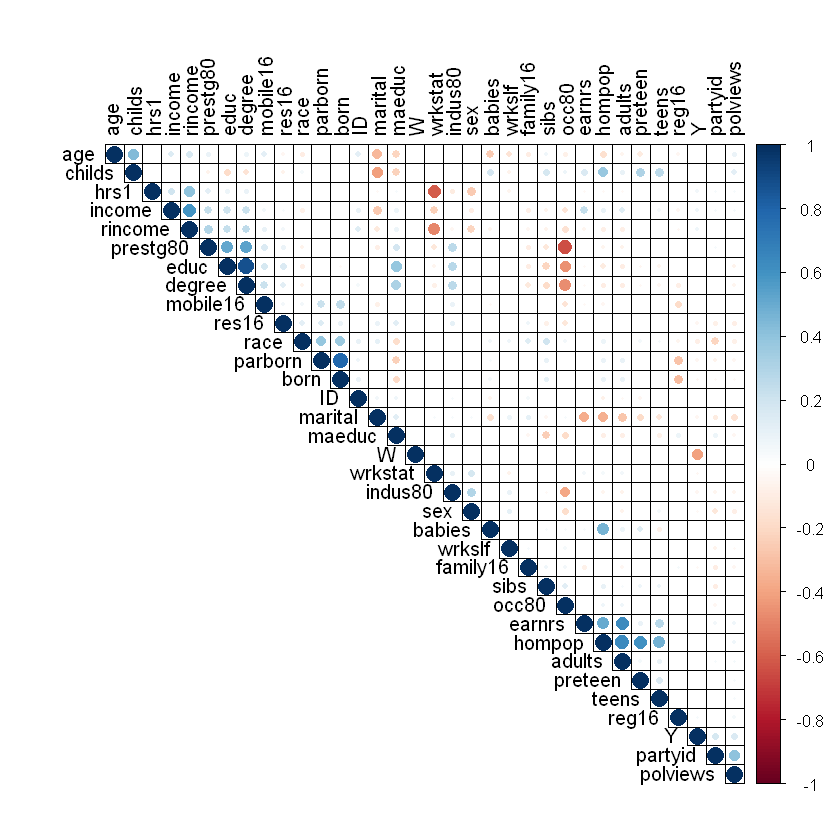

In [107]:
# Note: if the plot looks too cramped, try increasing fig.width and fig.height in the line above
pairwise_pvalues <- psych::corr.test(df, df)$p
corrplot(cor(df),
        type="upper",
        tl.col="black",
        order="hclust",
        tl.cex=1,
        addgrid.col = "black",
        p.mat=pairwise_pvalues,
        sig.level=0.05,
        number.font=10,
        insig="blank")

# HTE 1: Causal Trees

#### Step 1: Split the dataset
As explained above honesty requires us to separate different subsets of our training data for model selection and prediction.

- df_split: the splitting sample, used to build the tree
- df_est: the estimation sample, used to compute the average treatment effect in each leaf

In [ ]:
# Diving the data 40%-40%-20% into splitting, estimation and validation samples
split_size <- floor(nrow(df_train) * 0.5)
df_split <- sample_n(df_train, replace=FALSE, size=split_size)

# Make the splits
df_est <- anti_join(df_train,df_split, by ="ID")

### Step 2: Fit the tree
Begin by defining a formula containing only the outcome and the covariates.

In [9]:
#Step 2: Fit the tree
fmla_ct <- paste("factor(Y) ~", paste(covariate_names, collapse = " + "))

print('This is our regression model')
print( fmla_ct)

[1] "This is our regression model"
[1] "factor(Y) ~ hrs1 + partyid + income + rincome + wrkstat + wrkslf + age + polviews + educ + earnrs + race + wrkslf + marital + sibs + childs + occ80 + prestg80 + indus80 + res16 + reg16 + mobile16 + family16 + parborn + maeduc + degree + sex + race + born + hompop + babies + preteen + teens + adults"


 Next, we use the honest.causalTree function from the causalTree package.To ensure that honesty is enabled, the parameters for splitting and cross-validation below should not be changed. However, if your tree is not splitting at all, try decreasing the parameter minsize that controls the minimum size of each leaf.The function requires the user to specify a binary treatment variable in addition to the outcome variable and the features that are usually passed to rpart. Another feature is that we allow the user the option to restrict the set of potential split
points considered, and further, in the splitting process we rescale the covariate values within each leaf and each treatment group in order to ensure that when moving from one potential split point to the next, we move the same number of treatment and control observations from the right leaf to the left leaf.

In [10]:
ct_unpruned <- honest.causalTree(
  formula = fmla_ct,            # Define the model
  data = df_split,              # Subset used to create tree structure
  est_data = df_est,            # Which data set to use to estimate effects
  
  treatment = df_split$W,       # Splitting sample treatment variable
  est_treatment = df_est$W,     # Estimation sample treatment variable
  
  split.Rule = "CT",            # Define the splitting option
  cv.option = "TOT",            # Cross validation options
  cp = 0,                       # Complexity parameter
  
  split.Honest = TRUE,          # Use honesty when splitting
  cv.Honest = TRUE,             # Use honesty when performing cross-validation
  
  minsize = 10,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize = nrow(df_est)) # Num obs used in estimation after building the tree

[1] 2
[1] "CT"


The resulting object (ct_unpruned) will be rpart objects, so rpart methods for cross-validation and plotting can be used.

In [62]:
ct_unpruned

n= 5279 

node), split, n, deviance, yval
      * denotes terminal node

    1) root 5279 908.4839000 -0.362256100  
      2) polviews>=3.5 3790 681.3498000 -0.383856200  
        4) partyid>=2.5 2478 467.0125000 -0.409687500  
          8) rincome>=8.5 2098 400.4393000 -0.414477800  
           16) age>=31.5 1611 312.4789000 -0.404244700  
             32) degree< 2.5 1034 197.5618000 -0.410560900  
               64) teens< 0.5 832 155.6202000 -0.435136400  
                128) marital< 3.5 712 132.4784000 -0.446005600  
                  256) reg16< 2.5 155  27.5041800 -0.470096900  
                    512) partyid>=3.5 112  19.9967900 -0.505946600  
                     1024) indus80>=821.5 19   2.6309520 -0.488095200 *
                     1025) indus80< 821.5 93  17.1182700 -0.500463800  
                       2050) res16>=3.5 46   5.6969700 -0.689393900 *
                       2051) res16< 3.5 47  10.5309100 -0.316363600 *
                    513) partyid< 3.5 43   6.4069260

#### Step 3: Cross-validate
Prune the tree by cross-validation to avoid overfitting. The honest cross-validation method selected above (and recommended) penalizes an estimate of the variance in the treatment effects estimates across leaves, and this estimate is computed using the estimation sample. The cv.option selected above (TOT) uses an unbiased estimate of the test mean-squared error.

In [65]:
# Table of cross-validated values by tuning parameter.
ct_cptable <- as.data.frame(ct_unpruned$cptable)
head(ct_cptable,5)

,CP,nsplit,rel error,xerror,xstd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.862682e-05,0,1.0000000,1.0000000,0.004254579
2,9.591009e-05,1,0.9999014,0.9986940,0.004253946
3,6.320827e-05,2,0.9998055,0.9987092,0.004249093
4,5.372015e-05,3,0.9997423,0.9990817,0.004250225
5,3.700745e-05,4,0.9996885,0.9984239,0.004246965


In [66]:
nrow(ct_cptable)

[1] 90

In [67]:
# Obtain optimal complexity parameter to prune tree i.e. paprameter at with xerror is minimzed
selected_cp <- which.min(ct_cptable$xerror)
optim_cp_ct <- ct_cptable[selected_cp, "CP"]
optim_cp_ct

[1] 3.700745e-05

In [68]:
# Prune the tree at optimal complexity parameter.
ct_pruned <- prune(tree = ct_unpruned, cp = optim_cp_ct)
ct_pruned #now the tree is much smaller

n= 5279 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 5279 908.48390 -0.3622561  
   2) polviews>=3.5 3790 681.34980 -0.3838562  
     4) partyid>=2.5 2478 467.01250 -0.4096875  
       8) rincome>=8.5 2098 400.43930 -0.4144778  
        16) age>=31.5 1611 312.47890 -0.4042447 *
        17) age< 31.5 487  87.77372 -0.4488866 *
       9) rincome< 8.5 380  64.98938 -0.3739937 *
     5) partyid< 2.5 1312 200.73600 -0.3317680 *
   3) polviews< 3.5 1489 213.43410 -0.3089245 *

### Step 4: Predict point estimates (on estimation sample)

In [182]:
tauhat_ct_est <- predict(ct_pruned, newdata = df_est) #predict the treatment effect on the estimation sample,
length(tauhat_ct_est)

[1] 5279

#### Step 5: Compute standard errors

The `causalTree` package does not compute standard errors by default, but we can compute them using the following trick. First, define $L_{\ell}$ to indicate assignment to leaf $\ell$ and consider the following linear model.

\begin{align}
Y = \sum_{\ell} L_{\ell}\alpha_{\ell} + W \cdot L_{\ell} \beta_{\ell}
\end{align}

In [82]:
length(tauhat_ct_est)

[1] 5279

In [71]:
unique(tauhat_ct_est)

[1] -0.4042447 -0.3317680 -0.3089245 -0.4488866 -0.3739937

In [72]:
length(unique(tauhat_ct_est))

[1] 5

In [73]:
nrow(df_est)

[1] 5279

In [76]:
# Create a factor column 'leaf' indicating leaf assignment
num_leaves <- length(unique(tauhat_ct_est))  #There are as many leaves as there are predictions
df_est$leaf <- factor(tauhat_ct_est, labels = seq(num_leaves))
head(df_est$leaf,10)

[1] 2 4 4 4 2 4 5 4 2 5
Levels: 1 2 3 4 5

In [15]:
# Run the regression
ols_ct <- lm(as.formula("Y ~ 0 + leaf + W:leaf"), data= df_est) #Warning: the tree won't split for charitable dataset
print(as.formula("Y ~ 0 + leaf + W:leaf"))

Y ~ 0 + leaf + W:leaf


The interaction coefficients in this regression recover the average treatment effects in each leaf, since

\begin{align}
  E[Y|W=1, L=1] - E[Y|W=0, L=1] = (\alpha_{1} + \beta_{1}) - (\alpha_{1}) = \beta_{1}
\end{align}

Therefore, the standard error around the coefficients is also the standard error around the treatment effects. 

In [77]:
#askNK:charitable does not split
ols_ct_summary <- summary(ols_ct)
te_summary <- coef(ols_ct_summary)[(num_leaves+1):(2*num_leaves), c("Estimate", "Std. Error")]
te_summary

,Estimate,Std. Error
leaf1:W,-0.4488866,0.03717039
leaf2:W,-0.4042447,0.02035734
leaf3:W,-0.3739937,0.04210445
leaf4:W,-0.3317680,0.02258461
leaf5:W,-0.3089245,0.02118112


### Step 6: Predict point estimates (on test set)
To predict the treatment effect on a new, entirely unseen data, use the function predict as below.

In [80]:
nrow(df_test)

[1] 2640

In [83]:
#Step 6: Predict point estimates (on test set)
tauhat_ct_test <- predict(ct_pruned, newdata=df_test)

In [85]:
length(tauhat_ct_test)

[1] 2640

In [84]:
length(unique(tauhat_ct_test))

[1] 5

# Assessing heterogeneity

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

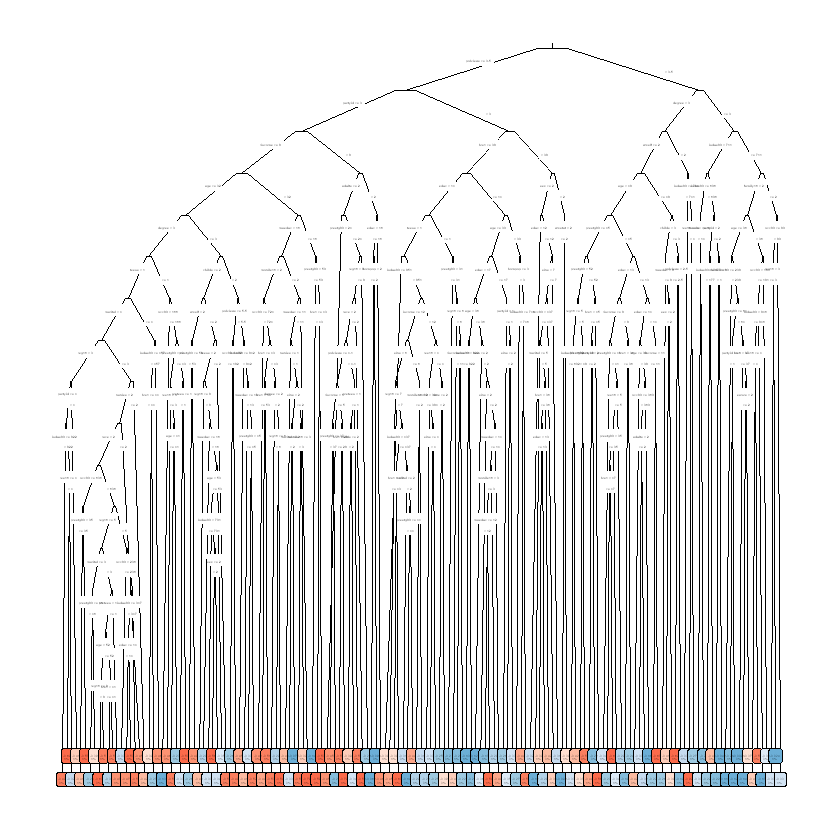

In [87]:
rpart.plot(
  x = ct_unpruned,        # Pruned tree
  type = 3,             # Draw separate split labels for the left and right directions
  fallen = TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round = 1,       # Rounding of the corners of the leaf node boxes
  extra = 100,          # Display the percentage of observations in the node
  branch = 0.1,          # Shape of the branch lines
  box.palette = "RdBu") # Palette for coloring the node

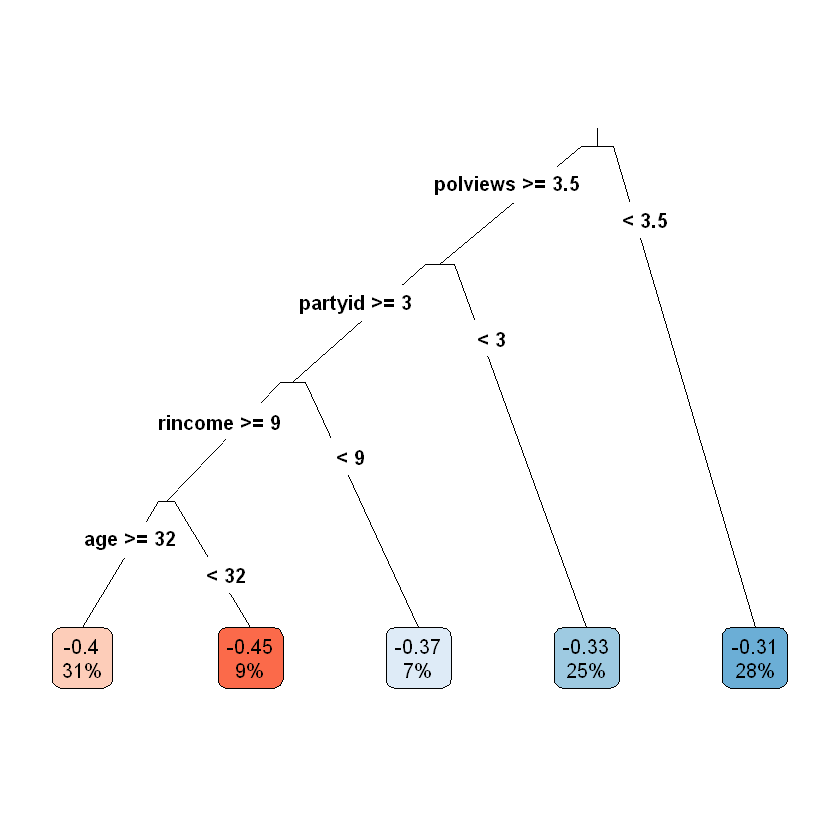

In [88]:
# ploting the (pruned) tree
rpart.plot(
  x = ct_pruned,        # Pruned tree
  type = 3,             # Draw separate split labels for the left and right directions
  fallen = TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round = 1,       # Rounding of the corners of the leaf node boxes
  extra = 100,          # Display the percentage of observations in the node
  branch = 0.1,          # Shape of the branch lines
  box.palette = "RdBu") # Palette for coloring the node

#can see five leavs here

### Treatment effect heterogeneity

We may want to test the treatment effect is different across leaves. That is, to test the null hypothesis that all leaf values are the same i.e.

$$
 E[Y|W=1, L=1] - E[Y|W=0, L=1] =  E[Y|W=1, L=\ell] - E[Y|W=0, L=\ell] \quad \text{for all } \ell > 1
$$

Following the linear model setup described in Step 5 in the previous subsection, we can use the function `linearHypothesis` from the `car` package to test this hypothesis.

In [89]:
hypothesis <- paste0("leaf1:W = leaf", seq(2, num_leaves), ":W") # Null hypothesis: all leaf values are the same
hypothesis

[1] "leaf1:W = leaf2:W" "leaf1:W = leaf3:W" "leaf1:W = leaf4:W"
[4] "leaf1:W = leaf5:W"

In [91]:
ftest <- linearHypothesis(ols_ct, hypothesis, test="F")
ftest #focus on the second row

#Testing null hypothesis: Average treatment effect is same across leaves

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5273,882.4026,NA,NA,NA,NA
2,5269,879.4120,4,2.990531,4.479444,0.001296254


Next, we test if the average treatment effect is different between all two  pairs of leaves. 
Note that here we are not performing any type of multiple hypothesis testing correction.

In [92]:
# Null hypothesis: leaf i = leaf k for all i != k
p_values_leaf_by_leaf <- matrix(nrow = num_leaves, ncol = num_leaves)
p_values_leaf_by_leaf

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [93]:
differences_leaf_by_leaf <- matrix(nrow = num_leaves, ncol = num_leaves)
differences_leaf_by_leaf

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [94]:
stderror_leaf_by_leaf <- matrix(nrow = num_leaves, ncol = num_leaves)
stderror_leaf_by_leaf

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [95]:
hypotheses_grid <- combn(1:num_leaves, 2)
hypotheses_grid

1,1,1,1,2,2,2,3,3,4
2,3,4,5,3,4,5,4,5,5


In [96]:
summ <- coef(summary(ols_ct))
summ

,Estimate,Std. Error,t value,Pr(>|t|)
leaf1,0.6036036,0.02741925,22.013860,8.078482e-103
leaf2,0.5777778,0.01435455,40.250496,4.060249e-309
leaf3,0.4941860,0.03115071,15.864362,2.107870e-55
leaf4,0.4102564,0.01635460,25.085084,2.797839e-131
leaf5,0.3705234,0.01516225,24.437224,4.983600e-125
leaf1:W,-0.4488866,0.03717039,-12.076456,3.840746e-33
leaf2:W,-0.4042447,0.02035734,-19.857438,1.112061e-84
leaf3:W,-0.3739937,0.04210445,-8.882523,8.821365e-19
leaf4:W,-0.3317680,0.02258461,-14.690008,6.549534e-48
leaf5:W,-0.3089245,0.02118112,-14.584899,2.892308e-47


In [97]:
invisible(apply(hypotheses_grid, 2, function(x) {
  leafi <- paste0("leaf", x[1], ":W")
  leafj <- paste0("leaf", x[2], ":W")
  hypothesis <- paste0(leafi, " = ", leafj)
  
  differences_leaf_by_leaf[x[2], x[1]] <<- summ[leafj, 1] - summ[leafi, 1]
  stderror_leaf_by_leaf[x[2], x[1]] <<- sqrt(summ[leafj, 2]^2 + summ[leafi, 2]^2)
  p_values_leaf_by_leaf[x[2], x[1]] <<- linearHypothesis(ols_ct, hypothesis)[2, "Pr(>F)"]
}))

#Pairwise leaf differences: Average treatment effect differences between leaf i and leaf j

In [98]:
hypothesis

[1] "leaf1:W = leaf2:W" "leaf1:W = leaf3:W" "leaf1:W = leaf4:W"
[4] "leaf1:W = leaf5:W"

In [99]:
differences_leaf_by_leaf

NA,NA,NA,NA,NA
0.04464193,NA,NA,NA,NA
0.07489288,0.03025096,NA,NA,NA
0.11711858,0.07247666,0.04222570,NA,NA
0.13996216,0.09532023,0.06506927,0.02284357,NA


In [100]:
stderror_leaf_by_leaf

NA,NA,NA,NA,NA
0.04237994,NA,NA,NA,NA
0.05616425,0.04676758,NA,NA,NA
0.04349371,0.03040536,0.04777917,NA,NA
0.04278175,0.02937790,0.04713199,0.03096295,NA


In [101]:
p_values_leaf_by_leaf

NA,NA,NA,NA,NA
0.292217941,NA,NA,NA,NA
0.182437936,0.517766225,NA,NA,NA
0.007108516,0.017175691,0.3768618,NA,NA
0.001076523,0.001183403,0.1674681,0.4606863,NA


### Covariate heterogeneity
Another measure of heterogeneity is how much the average level of each covariate changes across leaves. The following code summarizes that.

Important remark We should NOT conclude that a particular covariate is unrelated to treatment effects simply because the tree did not split on it. There can be many different ways to pick out a subgroup of individuals with high or low treatment effects. By comparing the average characteristics of individuals with high treatment effects to those with low treatment effects, we can get a fuller picture of the differences between these groups across all covariates.

In [122]:
# Null hypothesis: the mean is equal across all leaves
hypothesis <- paste0("leaf1 = leaf", seq(2, num_leaves))
means_per_leaf <- matrix(nrow = num_leaves, ncol = num_leaves)
significance <- matrix(nrow = 2, ncol=length(covariate_names))

# Regress each covariate on leaf assignment to means p
cov_means <- lapply(covariate_names, function(covariate) {
  lm(paste0(covariate, ' ~ 0 + leaf'), data = df_est)
})
cov_means

[[1]]

Call:
lm(formula = paste0(covariate, " ~ 0 + leaf"), data = df_est)

Coefficients:
leaf1  leaf2  leaf3  leaf4  leaf5  
45.68  45.19  30.02  41.50  41.54  


[[2]]

Call:
lm(formula = paste0(covariate, " ~ 0 + leaf"), data = df_est)

Coefficients:
leaf1  leaf2  leaf3  leaf4  leaf5  
4.520  4.634  4.455  1.034  1.954  


[[3]]

Call:
lm(formula = paste0(covariate, " ~ 0 + leaf"), data = df_est)

Coefficients:
 leaf1   leaf2   leaf3   leaf4   leaf5  
11.476  11.783   9.645  11.230  11.219  


[[4]]

Call:
lm(formula = paste0(covariate, " ~ 0 + leaf"), data = df_est)

Coefficients:
 leaf1   leaf2   leaf3   leaf4   leaf5  
10.856  11.411   4.876  10.102  10.121  


[[5]]

Call:
lm(formula = paste0(covariate, " ~ 0 + leaf"), data = df_est)

Coefficients:
leaf1  leaf2  leaf3  leaf4  leaf5  
1.072  1.073  1.516  1.163  1.169  


[[6]]

Call:
lm(formula = paste0(covariate, " ~ 0 + leaf"), data = df_est)

Coefficients:
leaf1  leaf2  leaf3  leaf4  leaf5  
1.924  1.848  1.839  1.910  1.876 

In [123]:
# Extract the mean and standard deviation of each covariate per leaf
cov_table <- lapply(cov_means, function(cov_mean) {
  as.data.frame(t(coef(summary(cov_mean))[,c("Estimate", "Std. Error")]))
})
cov_table

,leaf1,leaf2,leaf3,leaf4,leaf5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estimate,45.6776181,45.1905649,30.0157895,41.4961890,41.5439893
Std. Error,0.6044243,0.3323216,0.6842496,0.3682472,0.3456679
,leaf1,leaf2,leaf3,leaf4,leaf5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estimate,4.51950719,4.63438858,4.45526316,1.03353659,1.95366017
Std. Error,0.05787757,0.03182196,0.06552137,0.03526207,0.03309995
,leaf1,leaf2,leaf3,leaf4,leaf5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estimate,11.4763860,11.78274364,9.64473684,11.23018293,11.21893889


In [124]:
# Test if means are the same across leaves
cov_ftests <- sapply(cov_means, function(cov_mean) {
  # Sometimes the regression has no residual (SSE = 0), 
  # so we cannot perform an F-test
  tryCatch({
    linearHypothesis(cov_mean, hypothesis)[2, c("F", "Pr(>F)")]
  },
  error = function(cond) {
    message(paste0("Error message during F-test for`", cov_mean$terms[[2]], "`:"))
    message(cond)
    return(c("F" = NA, "Pr(>F)" = NA))
  })
})
cov_ftests
#33 is num of independent vars

F,109.6045,1981.125,150.7202,661.9689,135.5474,10.3392,279.8119,2223.055,52.31641,7.085889,...,38.00811,47.12793,35.86635,43.84787,1.502479,6.724509,19.72246,7.539748,17.64896,5.449667
Pr(>F),7.203875e-90,0,2.999141e-122,0,2.108931e-110,2.439507e-08,1.824473e-218,0,2.779549e-43,1.098038e-05,...,2.127477e-31,5.541133e-39,1.298115e-29,2.935418e-36,0.198579,2.146803e-05,3.951122e-16,4.716957e-06,2.119666e-14,0.0002239325


In [168]:
# Preparation to color the chart
temp_standardized <- sapply(seq_along(covariate_names), function(j) {
  covariate_name <- covariate_names[j]
  .mean <-mean(df_train[[covariate_name]], na.rm = TRUE) 
  .sd <- sd(df_train[[ covariate_name]], na.rm = TRUE)
  m <- as.matrix(round(signif(cov_table[[j]], digits=4), 3))
  .standardized <- (m["Estimate",] - .mean) / .sd
})
temp_standardized

leaf1,0.23709960,0.7709028,0.11341153,0.23922669,-0.23004859,0.150116452,-1.11174386,0.5090059,-0.01260238,-0.07392388,...,0.24947421,-0.04190262,-0.20896019,-0.07320745,-0.081777016,-0.0570229823,0.3389645458,-0.18507097,-0.32716208,0.04130881
leaf2,0.20223022,0.8267878,0.29688909,0.44020898,-0.22728798,-0.079062535,0.42428394,0.6421351,0.07480984,0.04148912,...,-0.01761002,0.10683704,-0.18896104,-0.19007732,-0.026309861,0.0182879832,-0.1054809588,0.03709476,0.07161463,0.01792393
leaf3,-0.87729760,0.7390385,-1.00885950,-1.94746062,0.99566331,-0.106202151,-0.19373365,0.5501950,-0.45330570,0.20063759,...,-0.07462801,-0.43202547,0.31901723,-0.14580843,-0.106043896,0.1937767425,0.1176488252,0.05523073,0.02034333,0.20630214
leaf4,-0.06035763,-0.9380021,-0.03948643,-0.03849429,0.02116714,0.107899270,0.07921046,0.2986470,-0.20563772,-0.04719666,...,-0.26068669,-0.18469268,0.09902664,0.27740217,-0.005509678,0.0005259631,-0.0020793516,0.02953810,0.03743377,-0.04313659
leaf5,-0.05751115,-0.4870003,-0.04560235,-0.03118584,0.03773081,0.005371829,-0.10111298,-1.2371200,0.20592818,-0.05205616,...,0.14444108,0.18078189,0.08102741,0.02241336,-0.002042981,-0.0840212529,-0.0002652883,-0.07776643,-0.06510882,-0.03923911


In [169]:
color_scale <- max(abs(c(max(temp_standardized, na.rm = TRUE), min(temp_standardized, na.rm = TRUE))))
color_scale <- color_scale * c(-1,1)
color_scale

[1] -1.947461  1.947461

We can also estimate the following normalized measure of variation across leaves. A higher number indicates that there is higher variation in across leaf averages.

$$
\frac{Var \left( E[X_{i} | L_{i}] \right)}{Var(X_{i})}
$$

In [129]:
############
covariate_means_per_leaf <- aggregate(. ~ leaf, df_est, mean)[,covariate_names]
covariate_means_per_leaf

hrs1,partyid,income,rincome,wrkstat,wrkslf,age,polviews,educ,earnrs,...,maeduc,degree,sex,race.1,born,hompop,babies,preteen,teens,adults
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45.67762,4.519507,11.476386,10.856263,1.071869,1.924025,26.98973,4.777085,13.96099,1.681725,...,12.57084,1.698152,1.394251,1.207392,1.067762,2.570842,0.4188912,0.1827515,0.04312115,1.926078
45.19056,4.634389,11.782744,11.410925,1.072626,1.847921,45.73060,4.957792,14.20484,1.776536,...,11.68032,1.873371,1.404097,1.140906,1.083799,2.677219,0.1744258,0.3302297,0.25325885,1.908132
30.01579,4.455263,9.644737,4.876316,1.515789,1.839474,38.18947,4.832737,12.75263,1.907895,...,11.48684,1.239474,1.657895,1.165789,1.060526,2.923684,0.2973684,0.3421053,0.22631579,2.052632
41.49619,1.033537,11.230183,10.102134,1.163110,1.910061,41.52134,4.491171,13.43293,1.704268,...,10.87043,1.529726,1.548018,1.405488,1.089939,2.651677,0.2309451,0.3246951,0.23475610,1.861280
41.54399,1.953660,11.218939,10.120887,1.168570,1.876427,39.32035,2.402955,14.56414,1.699799,...,12.21558,1.959704,1.539288,1.261249,1.091336,2.532572,0.2323707,0.2545332,0.18132975,1.863667


In [146]:
# Converting all columns to numerical as some of the methods below don’t accept factor variables
df_est <- data.frame(lapply(df_est, function(x) as.numeric(as.character(x))))                
df_est <- df_est %>% mutate_if(is.character,as.numeric)
covariate_means <- apply(df_est, 2, mean)[covariate_names]
 as.data.frame(covariate_means)

covariate_means
<dbl>
42.1964387
2.9598409
11.3042243
10.2002273
1.1540064
1.8778178
40.6046600
4.0955293
13.9873082


In [137]:
leaf_weights <- table(df_est$leaf) / dim(df_est)[1] 
leaf_weights


         1          2          3          4          5 
0.09225232 0.30517143 0.07198333 0.24853192 0.28206100 

In [138]:
deviations <- t(apply(covariate_means_per_leaf, 1, function(x) x - covariate_means))
deviations

hrs1,partyid,income,rincome,wrkstat,wrkslf,age,polviews,educ,earnrs,...,maeduc,degree,sex,race.1,born,hompop,babies,preteen,teens,adults
3.4811794,1.559666,0.17216175,0.65603552,-0.082137857,0.046206872,-13.6149269,0.6815553,-0.02632258,-0.05591486,...,0.87260359,-0.05236898,-0.10110846,-0.04113972,-0.0165344613,-0.06715773,0.182672190,-0.11200125,-0.16392564,0.03007500
2.9941261,1.674548,0.47851935,1.21069758,-0.081380742,-0.029897222,5.1259421,0.8622624,0.21753351,0.03889661,...,-0.01791552,0.12284965,-0.09126214,-0.10762565,-0.0004973856,0.03921950,-0.061793158,0.03547688,0.04621206,0.01212856
-12.1806492,1.495422,-1.65948744,-5.32391153,0.361783033,-0.038344084,-2.4151863,0.7372080,-1.23467662,0.17025503,...,-0.21139620,-0.51104725,0.16253577,-0.08274245,-0.0237699524,0.28568459,0.061149440,0.04735247,0.01926900,0.15662855
-0.7002497,-1.926304,-0.07404136,-0.09809317,0.009103315,0.032243207,0.9166815,0.3956417,-0.55438137,-0.03337141,...,-0.82781147,-0.22079532,0.05265932,0.15695589,0.0056427562,0.01367721,-0.005273859,0.02994233,0.02770931,-0.03472254
-0.6524495,-1.006181,-0.08528540,-0.07934081,0.014563069,-0.001390636,-1.2843107,-1.6925743,0.57682880,-0.03784118,...,0.51734262,0.20918357,0.04392914,0.01271724,0.0070401992,-0.10542743,-0.003848262,-0.04021955,-0.02571704,-0.03233614


In [145]:
covariate_means_weighted_var <- apply(deviations, 2, function(x) sum(leaf_weights * x^2))
as.data.frame(covariate_means_weighted_var)

,covariate_means_weighted_var
,<dbl>
hrs1,1.477574e+01
partyid,2.448892e+00
income,2.742616e-01
rincome,2.531486e+00
wrkstat,1.214558e-02
wrkslf,8.345014e-04
age,2.621291e+01
polviews,1.155822e+00
educ,2.944722e-01


In [144]:
covariate_var <- apply(df_est, 2, var)[covariate_names]
 as.data.frame(covariate_var)

covariate_var
<dbl>
1.925588e+02
4.079478e+00
2.674008e+00
7.575097e+00
1.303131e-01
1.072741e-01
1.497590e+02
1.841691e+00
7.717346e+00


In [143]:
cov_variation <- covariate_means_weighted_var / covariate_var
as.data.frame(cov_variation) 

,cov_variation
,<dbl>
hrs1,0.076733680
partyid,0.600295365
income,0.102565721
rincome,0.334185253
wrkstat,0.093203070
wrkslf,0.007779154
age,0.175033959
polviews,0.627587040
educ,0.038157190


In [142]:
sorted_cov_variation <- sort(cov_variation, decreasing = TRUE)
table <- as.data.frame(sorted_cov_variation)
colnames(table) <- NULL
table

polviews,0.627587040
partyid,0.600295365
rincome,0.334185253
age,0.175033959
income,0.102565721
wrkstat,0.093203070
hrs1,0.076733680
childs,0.062791747
marital,0.045836147
educ,0.038157190
prestg80,0.035828581


# HTE 2: Causal Forests and the R-Learner

https://www.markhw.com/blog/causalforestintro
The honest causal forest (Athey & Imbens, 2016; Athey, Tibshirani, & Wager, 2018; Wager & Athey, 2018) is a random forest made up of honest causal trees, and the “random forest” part is fit just like any other random forest (e.g., resampling, considering a subset of predictors, averaging across many trees).

https://www.statworx.com/ch/blog/machine-learning-goes-causal-ii-meet-the-random-forests-causal-brother/

Generalised Random Forests follows the idea of Random Forests and apart from heterogeneous treatment effect estimation, this algorithm can also be used for non-parametric quantile regression and instrumental variable regression. 
 It keeps the main structure of Random Forests such as the recursive partitioning, subsampling and random split selection. However, instead of averaging over the trees Generalised Random Forests estimate a weighting function and uses the resulting weights to solve a local GMM model. To estimate heterogeneous treatment effects, this algorithm has two important additional features, which distinguish it from standard Random Forests.
 
 
 Random Forests are usually evaluated by applying them to a test set and measure the accuracy of the predictions of Y using an error measure such as the mean squared error. Because we can never observe treatment effects, this form of performance measure is not possible in Causal Forests. When estimating causal effects, one, therefore, evaluates their accuracy by examining the bias, standard error and the related confidence interval of the estimates. To ensure that an estimate is as accurate as possible, the bias should asymptotically disappear and the standard error and, thus, the confidence interval, should be as small as possible. To enable this statistical inference in their Generalised Random Forest, Athey, Tibshirani and Wager introduce so-called honest trees.

### Step 1: Fit the forest

In [149]:
cf <- causal_forest(
  X = as.matrix(df_train[,covariate_names]),
  Y = df_train$Y,
  W = df_train$W,
  num.trees=200) # This is just for speed. In a real application, remember increase this number!
# A good rule of thumb (for inference settings) is num.trees = number of individuals 
# (nrow in our case, but would be different if using a panel dataset)

In [150]:
cf

GRF forest object of type causal_forest 
Number of trees: 200 
Number of training samples: 10558 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.044 0.173 0.046 0.010 0.001 0.001 0.020 0.270 0.059 0.006 0.006 0.001 0.036 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
0.007 0.009 0.035 0.024 0.068 0.006 0.029 0.012 0.009 0.010 0.064 0.037 0.002 
   27    28    29    30    31    32    33 
0.007 0.001 0.003 0.001 0.002 0.002 0.001 

#### Step 2(a): Predict point estimates and standard errors (training set, out-of-bag)

In [153]:
oob_pred <- predict(cf, estimate.variance=TRUE)
head(oob_pred,5)

,predictions,variance.estimates,debiased.error,excess.error
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.2860210,0.005540553,0.001424499,0.0001321792
2,-0.4931610,0.009896173,0.137275386,0.0003520233
3,-0.3094924,0.002911441,0.276641735,0.0003155732
4,-0.3437429,0.006627436,0.177763681,0.0004198552
5,-0.3394635,0.008951153,0.251714262,0.0004093933


In [155]:
nrow(oob_pred)

[1] 10558

The column predictions and variance.estimates contains estimates of the CATE and its variance for each observation. In addition, when using out-of-bag predictions, the column debiased.error contains estimates of what the error on the CATE predictions. The word debiased here indicates that the error is only due to sample variability in the data, and the variability due to randomness in the construction of the random forest has been removed. In other words, debiased.error represents the error we should expect if we grew a forest containing an infinite number of trees.

In [157]:
oob_tauhat_cf <- oob_pred$predictions
oob_tauhat_cf_se <- sqrt(oob_pred$variance.estimates)

##### Step 2(b): Predict point estimates and standard errors (test set)

In [158]:
test_pred <- predict(cf, newdata=as.matrix(df_test[covariate_names]), estimate.variance=TRUE)
tauhat_cf_test <- test_pred$predictions
tauhat_cf_test_se <- sqrt(test_pred$variance.estimates)

cf_known_prop <- grf::causal_forest(
  X = as.matrix(df_train[covariate_names]),
  Y = df_train$Y,
  W = df_train$W,
  W.hat = rep(mean(df_train$W), times=nrow(df_train)), # Passing the known (approximate) propensity score
  num.trees=200)

cf_known_prop 

GRF forest object of type causal_forest 
Number of trees: 200 
Number of training samples: 10558 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.052 0.157 0.035 0.006 0.001 0.001 0.033 0.251 0.072 0.005 0.013 0.001 0.033 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
0.012 0.009 0.035 0.024 0.102 0.006 0.014 0.004 0.008 0.003 0.062 0.042 0.002 
   27    28    29    30    31    32    33 
0.006 0.002 0.004 0.001 0.002 0.001 0.003 

In [161]:
head(test_pred,5) #This time, test_pred will not contain debiased.error, since we are not using out-of-bag estimates.

,predictions,variance.estimates
,<dbl>,<dbl>
1,-0.3562572,0.006967583
2,-0.2506584,0.001572122
3,-0.3279351,0.002617340
4,-0.3255471,0.004778846
5,-0.2795496,0.005173805


**Note:** In experiments where we have additional information about the outcome model $E[Y|X]$ or the assignment model $E[W|X]$, we can pass them directly to the algorithm. For example, if we knew that the propensity score were constant and approximately equal to $\bar{W}$, we could fit the forest as follows.

In [163]:
cf_known_prop <- grf::causal_forest(
  X = as.matrix(df_train[covariate_names]),
  Y = df_train$Y,
  W = df_train$W,
  W.hat = rep(mean(df_train$W), times=nrow(df_train)), # Passing the known (approximate) propensity score
  num.trees=200)  

#We can similarly pass our own estimates of the outcome model using the argument Y.hat

In [ ]:
#For assessing hetergeniety to or just the source of this code of refer: SusanAthey/hte_tutorial.Rmd

# Additional Point

A third problem is specific to considering treatment effect heterogeneity. To see the
problem, suppose that a covariate strongly affects the mean of outcomes, but not treatment
effects. Within a leaf, some observations are treated and some are control. If we consider
every level of the covariate in the leaf as a possible split point, then shifting from one
split point to the next shifts a single observation from the right leaf to the left leaf. This
observation is in the treatment or the control group, but not both; suppose it is in the
treatment group. If the covariate has a strong effect on the level of outcomes, the observation that is shifted will be likely have an outcome more extreme than average. It will change
the sample average of the treatment group, but not the control group, leading to a large
change in the estimated treatment effect difference. We expect the estimated difference in
treatment effects across the left and right leaves to fluctuate greatly with the split point in
this scenario. This variability around the true mean difference in treatment effects occurs
more often when covariates affect mean outcomes, and thus it can lead the estimators to
split too much on such covariates, and also to find spurious opportunities to split.
To address this problem, we incorporate the following modifications to the splitting rule.
We include a parameter bucketNum, the target number of observations per “bucket.” For
each leaf, before testing possible splits for a particular covariate, we order the observations
by the covariate value in the treatment and control group separately. Within each group, we
place the observations into buckets with bucketNum observations per bucket. If this results
in less than minsize (another user-set parameter) buckets, then we use fewer observations
per bucket (to attain minsize buckets). If this results in more than bucketMax buckets, we
use more observations per bucket to obtain bucketMax buckets. We number the buckets, and
considering potential splits by bucket number rather than the raw values of the covariates.
This guarantees that when we shift from one split point to the next, we add both treatment
and control observations, leading to a smoother estimate of the goodness of fit function as a
function of the split point. After the best bucket number to split on is selected, we translate
that into a split point by averaging the maximum covariate value in the corresponding
treatment and control buckets.

# References

https://www.markhw.com/blog/causalforestintro

https://www.statworx.com/ch/blog/machine-learning-goes-causal-ii-meet-the-random-forests-causal-brother/

https://stats.stackexchange.com/questions/370033/how-does-a-causal-tree-optimize-for-heterogenous-treatment-effects

https://datascience.quantecon.org/applications/heterogeneity.html#het-cddf2018

https://www.aeaweb.org/webcasts/2018/machine-learning-and-econometrics-part-5

https://github.com/susanathey/causalTree

https://scholar.princeton.edu/sites/default/files/bstewart/files/lundberg_methods_tutorial_reading_group_version.pdf

https://stats.stackexchange.com/questions/370033/how-does-a-causal-tree-optimize-for-heterogenous-treatment-effects

### not fair

Want to predict individual i’s treatment effect 

$\tau_{i}$ = $Y_{i}(1)$ - $Y_{i}(0)$

This is not observed for any individual and so there is no test set. Thus note clear how to apply standard machine learning tools.

Let 

$\mu(w,x)$ = $\mathop{\mathbb{E}}[Y_{i}(W_{i})|X_{i}\in l(x|\Pi)]$

$\tau(x)$ = $\mu(1,x)$ - $\mu(0,x)$

#### Potential Approach:1

Estimate $\mu(w,x)$  using tree including both covariates
- Include PS as attribute if needed
- Choose tuning parameters as usual
- Construct prediction using $\hat{\mu}(1,x)$ - $\hat{\mu}(0,x)$

Problems:

1. Approaches not tailored to the goal of estimating treatment effects : in a data poor environment ,all te degrees of freedon are used predicting the outcomes and not predicting treatment effect difference. 
2. Not giving enough importance to treatment effect : Estimate is zero for x where tree does not split on w
2. How do you evaluate goodness of fit for tree splitting and cross-validation?
$\hat{\mu}(1,x)$ - $\hat{\mu}(0,x)$ is not observed and thus there is no ground truth for any unit

#### Potential Approach: 2

Idea and trick: one can come up with an unbiased estimate of each treatment effect just based on you and your outcome
How? The estimate will be noisy/has high variance but unbiased.

Apriori, I assume that I don't know if you've been treated or are control, letting the treatment be a random variable. Thus, possible to take expectation. Suppose the probability of treatment is $p_{i}$. Then,

$Y_{i}^{*} = \frac{Y_{i}}{p_{i}}$ if $W_{i}$ = 1

$Y_{i}^{*} = - \frac{Y_{i}}{1-p_{i}}$ if $W_{i}$ = 1

$\mathop{\mathbb{E}}[Y_{i}^{*}]$ = $p_{i}\frac{1}{p_{i}}\mathop{\mathbb{E}}[{Y_{i}(1)}] - (1-p_{i})\frac{1}{(1-p_{i})}\mathop{\mathbb{E}}[{Y{i}(0)}]$ = $\mathop{\mathbb{E}}[\tau_{i}]$ i.e. the expectation of the treatment effect. (in an unconfoundedness setting, divide by propensity score or 1-propensity score).

The above method gives an estimate of the ground truth that can be used as a target. So, first calculate $Y_{i}^{*}$ and then run any ML model on $Y_{i}^{*}$ with x as independent variable. The resulting reg coeffs with be het because the LSH was atreatment effect. Note recommended but is good for off the shelf use.